In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

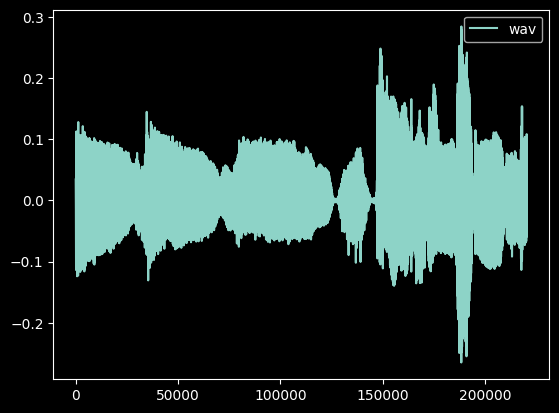

In [3]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Expander

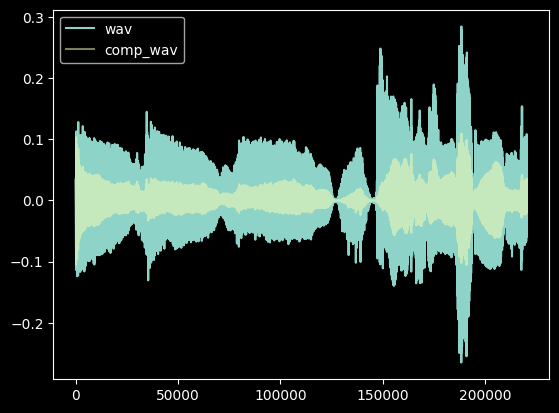

In [8]:
from diffFx_pytorch.processors.dynamics.expander import Expander
COMP_DSP_PARAMS = {
    'threshold_db': -40.0,
    'ratio': 1000.0,  
    'knee_db': 1.0,
    'attack_ms': 10,
    'release_ms': 200.0
}

Processor = Expander(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),  alpha=0.5, label='comp_wav')
plt.legend()